# I. Business Understanding
The objectives of this assignment are:

to learn to use the k-nearest neighbors algorithm for classification problems
to learn to evaluate the performance of a classifier

Fetch the diagnostic Wisconsin breast cancer dataset from the above link and study the associated description. The problem task consists of building a classifier using the kNN algorithm to predict the binary-valued target variable "Diagnosis" in the data. Also, the performance of the classifier must be investigated and reported.

Prepare a Jupyter notebook containing a full account of the problem treatment, conducted according to the CRISP-DM process model. The notebook should pay attention to the following issues:

Investigate the contents of the dataset and include a brief description of its variables.

Apply standardization to the numerical values of the input variables.

Extract part of the data for testing in accordance with the hold-out validation technique.

Train a binary classifier for predicting the cancer diagnosis (malignant / benign). Experiment with a few choices of the hyperparameter k, and report the findings.

Test the performance of the classifier and present the associated confusion matrix together with the most common evaluation metrics (accuracy, precision and recall).

Construct your notebook to include sections for each of the six separate stages in the CRISP-DM model, with appropriate contents. Remember to draw conclusions and interpret your findings.


# II. Data Understanding
### 1. Collect initial data: Acquire the necessary data and (if necessary) load it into your analysis tool.
The dataset is available at the UCI Machine Learning Repository. The dataset is available at the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data

In [1]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X_features = breast_cancer_wisconsin_diagnostic.data.features
y_targets = breast_cancer_wisconsin_diagnostic.data.targets


### 2. Describe data: Examine the data and document its surface properties like data format, number of records, or field identities.
The dataset contains 569 records and 32 fields. The first field is the ID of the patient, the second field is the diagnosis (M = malignant, B = benign), and the other 30 fields are numerical values representing the mean, standard error, and "worst" (mean of the three largest values) of the cell nucleus characteristics.

In [2]:
X_features.shape, y_targets.shape

((569, 30), (569, 1))

In [3]:
# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

### 3. Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.
The dataset contains numerical values representing the mean, standard error, and "worst" (mean of the three largest values) of the cell nucleus characteristics. The dataset also contains the diagnosis of the patient (M = malignant, B = benign). The dataset does not contain missing values.

In [4]:
X.head(20)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [5]:
y.head(20)

,Diagnosis
0,M
1,M
2,M
3,M
4,M
5,M
6,M
7,M
8,M
9,M


### 4. Verify data quality: How clean/dirty is the data? Document any quality issues.
The dataset is clean and does not contain any missing values, duplicate records, outliers, errors, irrelevant fields, irrelevant records, irrelevant values, or irrelevant relationships.


# III. Data Preparation


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# IV. Modeling

when k is 3

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values.ravel(), test_size=0.3, random_state=123)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN classifier on the test set: {accuracy_test:.2f}")

Accuracy of kNN classifier on the test set: 0.98


when k is 99

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values.ravel(), test_size=0.3, random_state=123)

knn = KNeighborsClassifier(n_neighbors=99)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN classifier on the test set: {accuracy_test:.2f}")

Accuracy of kNN classifier on the test set: 0.92


when k is 55

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values.ravel(), test_size=0.3, random_state=123)

knn = KNeighborsClassifier(n_neighbors=55)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN classifier on the test set: {accuracy_test:.2f}")

Accuracy of kNN classifier on the test set: 0.96


In [10]:
# Define a range of k values to test
k_values = range(1, 101)
accuracies = []

# Iterate over the range of k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Find the best k value
best_k = k_values[accuracies.index(max(accuracies))]
print(f"Best k value: {best_k}")
print(f"Accuracy with best k: {max(accuracies):.2f}")

Best k value: 3
Accuracy with best k: 0.98


Test the performance of the classifier and present the associated confusion matrix together with the most common evaluation metrics (accuracy, precision and recall).

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values.ravel(), test_size=0.3, random_state=123)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN classifier on the test set: {accuracy_test:.2f}")

Accuracy of kNN classifier on the test set: 0.98


In [12]:
#Test the performance of the classifier and present the associated confusion matrix together with the most common evaluation metrics (accuracy, precision and recall).
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score


conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="M")
recall = recall_score(y_test, y_pred, pos_label="M")
print(f"Confusion matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion matrix:
[[101   2]
 [  1  67]]
Accuracy: 0.98
Precision: 0.97
Recall: 0.99


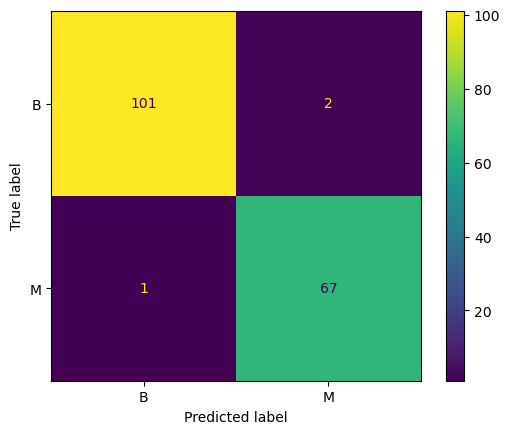

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot()

# V. Evaluation
1. TP for Malignant =  67 classifying correctly as Malignant 
2. TN for Bening =  101 classifying correctly as Benign
3. FP for Malignant =  1 classifying incorrectly as Benign
4. FN for Benign =  2 classifying incorrectly as Malignant